# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Chosing IMPERIAL due to the exercise is in Fahrenheit
units = "imperial"

# Print the URL for the Open Weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=965010596c72e3ffae1f9da4fdaa87ed&units=imperial&q='

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initial print as asked in the result.

print('''Beginning Data Retrieval     
-----------------------------''')

# Declare variables would be used in the loop.

record_num = 0                   # The result has the structure "Processing Record *1* of Set 1". Change each iteration.
record_set = 1                   # The result has the structure "Processing Record 1 of Set *1*". Change each set of 50.
city_result = []                 # Variabes would be concatenate in a list to make the Data Frame (lat/tem/hum/cloud/wind)  

# Loop for save the iteration of each response.
# Here is an example of how data looks in API: http://api.openweathermap.org/data/2.5/weather?appid=965010596c72e3ffae1f9da4fdaa87ed&units=imperial&q=ostrovnoy

for city in cities:
    city_url = query_url + city                   # Add to the URL the city save in cities, taken randomly for step before.
    weather_response = requests.get(city_url)    # Declare a JSON to read the API
    weather_json = weather_response.json()

    try:                         # Using try to jump error, in case the city do not contain the paramters.
        record_num += 1          # Each iteration would add a number. Ex. Record 1, 2 , 3,...
        latitude = weather_json["coord"]["lat"]        # It reads JSON and teakes the parameter "lat" which is inside the main "coord"
        longitude = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        
        # Use APPEND to concatenate all the info got it above
        city_result.append({"City":city, "Lat": latitude, "Lng" : longitude, "Max Temp": max_temp, 
                            "Humidity": humidity, "Cloudiness":  cloudiness, "Wind Speed": wind_speed, 
                            "Country": country, "Date": date})
        
        print(f"Processing Record {record_num} of Set {record_set} | {city}")
        
    except KeyError:                              # Use excecpt in case the coordinated do not find a city near.
        print("City not found.Skipping...")
        
    # Declare limits to jump to the next set of information. As example, maximum iteration is 50 by set.
    if record_num == 50:
        record_set += 1
        record_num = 0
        time.sleep(5)         # Giving time space between sets to avoid errors.
            
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
City not found.Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | batemans bay
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | chaozhou
Processing Record 10 of Set 1 | swan hill
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | novovasylivka
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | port macquarie
Processing Record 16 of Set 1 | port hedland
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | tarko-sale
Processing Record 21 of Set 1 | storforshei
Processing Record 22 of Set 1 | chokurdakh
Processing Record 23

Processing Record 4 of Set 5 | aldan
City not found.Skipping...
Processing Record 6 of Set 5 | kihei
City not found.Skipping...
Processing Record 8 of Set 5 | yulara
Processing Record 9 of Set 5 | ndjole
Processing Record 10 of Set 5 | itoman
Processing Record 11 of Set 5 | kimbe
Processing Record 12 of Set 5 | port blair
Processing Record 13 of Set 5 | ahar
Processing Record 14 of Set 5 | teramo
Processing Record 15 of Set 5 | guacui
Processing Record 16 of Set 5 | bredasdorp
Processing Record 17 of Set 5 | sobolevo
Processing Record 18 of Set 5 | isangel
Processing Record 19 of Set 5 | roswell
Processing Record 20 of Set 5 | saint-francois
Processing Record 21 of Set 5 | biak
Processing Record 22 of Set 5 | kudahuvadhoo
Processing Record 23 of Set 5 | ugoofaaru
Processing Record 24 of Set 5 | haines junction
Processing Record 25 of Set 5 | severo-kurilsk
Processing Record 26 of Set 5 | rawson
Processing Record 27 of Set 5 | namibe
Processing Record 28 of Set 5 | port elizabeth
Proces

Processing Record 10 of Set 9 | whitehorse
Processing Record 11 of Set 9 | vestmanna
Processing Record 12 of Set 9 | ratnagiri
Processing Record 13 of Set 9 | santa vitoria do palmar
Processing Record 14 of Set 9 | nuuk
Processing Record 15 of Set 9 | nushki
Processing Record 16 of Set 9 | hundested
Processing Record 17 of Set 9 | areosa
Processing Record 18 of Set 9 | kroonstad
Processing Record 19 of Set 9 | kinsale
Processing Record 20 of Set 9 | humberto de campos
City not found.Skipping...
Processing Record 22 of Set 9 | wajima
Processing Record 23 of Set 9 | colares
Processing Record 24 of Set 9 | cabras
Processing Record 25 of Set 9 | turayf
Processing Record 26 of Set 9 | tromso
Processing Record 27 of Set 9 | kavaratti
Processing Record 28 of Set 9 | bathsheba
Processing Record 29 of Set 9 | labuhan
Processing Record 30 of Set 9 | santiago del estero
Processing Record 31 of Set 9 | berlevag
Processing Record 32 of Set 9 | praxedis guerrero
Processing Record 33 of Set 9 | nemur

Processing Record 12 of Set 13 | muros
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a Data Frame - in this case is not necessary to clean, in case use dropna()

weather_result = pd.DataFrame(city_result)
weather_result

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.1333,140.3000,53.60,50,75,17.27,JP,1619375599
1,punta arenas,-53.1500,-70.9167,59.00,55,40,18.41,CL,1619375599
2,pevek,69.7008,170.3133,19.53,94,100,11.27,RU,1619375576
3,batemans bay,-35.7167,150.1833,52.00,87,9,1.01,AU,1619375600
4,faanui,-16.4833,-151.7500,80.85,66,8,4.68,PF,1619375600
...,...,...,...,...,...,...,...,...,...
555,solhan,38.9634,41.0293,57.85,62,77,7.29,TR,1619375830
556,ndende,-2.4008,11.3581,75.83,93,100,1.32,GA,1619375831
557,hurghada,27.2574,33.8129,80.60,39,0,4.61,EG,1619375664
558,turhal,40.3875,36.0811,48.20,71,75,11.50,TR,1619375831


In [5]:
# Save dataframe in output_data file.

weather_result.to_csv("output_data/weather_city_data.csv", index=False, header=True)


In [6]:
# Use fucntion .describe to show the metrics for the Data Frame

weather_result.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.00000,560.000000,560.000000,560.000000,5.600000e+02
mean,21.593855,18.399820,60.42775,65.835714,52.642857,8.326054,1.619376e+09
std,32.980872,90.494404,20.00249,22.558169,39.757642,5.395599,1.114228e+02
min,-54.800000,-175.200000,2.43000,9.000000,0.000000,0.340000,1.619375e+09
25%,-5.187200,-64.350300,45.98500,50.000000,12.000000,4.312500,1.619376e+09
50%,29.064900,24.366700,62.60000,70.000000,53.500000,7.000000,1.619376e+09
75%,48.168575,98.279350,77.63500,84.000000,96.000000,11.500000,1.619376e+09
max,78.218600,178.416700,98.60000,100.000000,100.000000,33.380000,1.619376e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_result.loc[weather_result["Humidity"] <= 100]

clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.1333,140.3000,53.60,50,75,17.27,JP,1619375599
1,punta arenas,-53.1500,-70.9167,59.00,55,40,18.41,CL,1619375599
2,pevek,69.7008,170.3133,19.53,94,100,11.27,RU,1619375576
3,batemans bay,-35.7167,150.1833,52.00,87,9,1.01,AU,1619375600
4,faanui,-16.4833,-151.7500,80.85,66,8,4.68,PF,1619375600
...,...,...,...,...,...,...,...,...,...
555,solhan,38.9634,41.0293,57.85,62,77,7.29,TR,1619375830
556,ndende,-2.4008,11.3581,75.83,93,100,1.32,GA,1619375831
557,hurghada,27.2574,33.8129,80.60,39,0,4.61,EG,1619375664
558,turhal,40.3875,36.0811,48.20,71,75,11.50,TR,1619375831


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

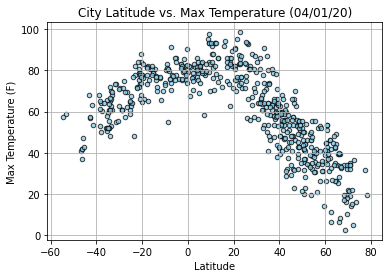

In [8]:
# Create a scatter plot (alpha = size / edgecolor = border / color = circle color) 
clean_city_data.plot.scatter(x="Lat", y="Max Temp", color="skyblue", alpha=0.75, edgecolors = "black")

# Additional Properties
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Figures/fig1.png")
plt.show()


## Latitude vs. Humidity Plot

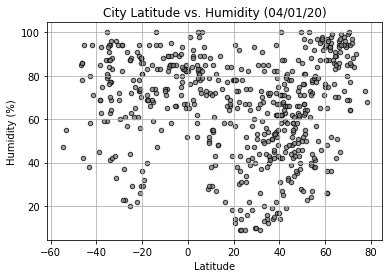

In [9]:
# Create a scatter plot
clean_city_data.plot.scatter(x="Lat", y="Humidity", color="grey", alpha=0.75, edgecolors = "black")

# Additional Properties
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid ()
plt.savefig("Figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

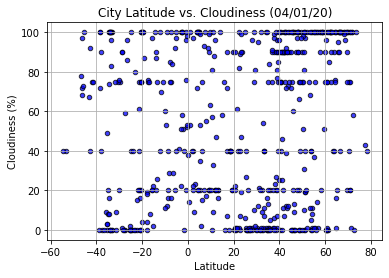

In [10]:
# Create a scatter plot
clean_city_data.plot.scatter(x="Lat", y="Cloudiness", color="blue", alpha=0.75, edgecolors = "black")

# Additional Properties
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid ()
plt.savefig("Figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

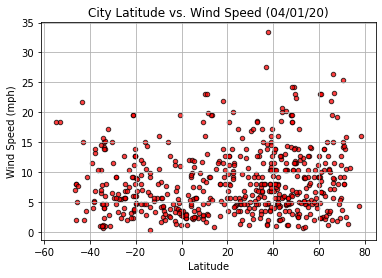

In [11]:
# Create a scatter plot
clean_city_data.plot.scatter(x="Lat", y="Wind Speed", color="red", alpha=0.75, edgecolors = "black")

# Additional Properties
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid ()
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [12]:
# Using the fucntion .loc to filter the values < or > than 0. Important, use the original DF, otherwise not possible to do it.

north_hemisphere = weather_result.loc[weather_result["Lat"] > 0]
south_hemisphere = weather_result.loc[weather_result["Lat"] < 0]

north_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.1333,140.3000,53.60,50,75,17.27,JP,1619375599
2,pevek,69.7008,170.3133,19.53,94,100,11.27,RU,1619375576
7,chaozhou,23.6651,116.6379,71.60,78,90,4.47,CN,1619375601
10,kapaa,22.0752,-159.3190,75.99,73,40,13.80,US,1619375584
11,novovasylivka,46.8315,35.7536,45.99,56,100,3.53,UA,1619375602


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation equals to -0.86


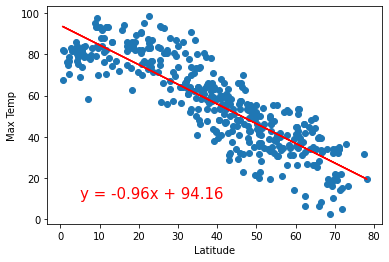

<Figure size 432x288 with 0 Axes>

In [13]:
# Calculate the correlation coefficient and linear regression model 

x_axis = north_hemisphere["Lat"]
y_axis = north_hemisphere["Max Temp"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Figures/fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation equals to 0.77


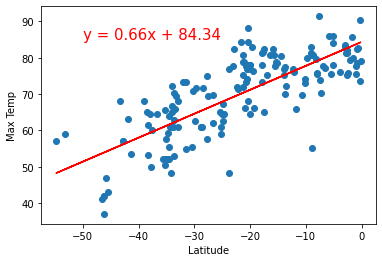

<Figure size 432x288 with 0 Axes>

In [14]:
# Calculate the correlation coefficient and linear regression model 

x_axis = south_hemisphere["Lat"]
y_axis = south_hemisphere["Max Temp"]
corr=round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation equals to {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Figures/fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression